<a href="https://colab.research.google.com/github/Bevier19jac/3DDigitalDataset/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install requests textblob wordcloud imageio matplotlib


In [4]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from textblob import TextBlob
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:

target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text


blob = TextBlob(data)

In [6]:
# Convert to lowercase
words = blob.words.lower()

# Load stop words from NLTK
stop_words = set(nltk.corpus.stopwords.words('english'))

# Filter out stop words
filtered_words = [word for word in words if word not in stop_words]

print(filtered_words[:20])


['project', 'gutenberg', "'s", 'etext', 'shakespeare', "'s", 'first', 'folio', 'tragedie', 'hamlet', 'ebook', 'one', 'project', 'gutenberg', "'s", 'early', 'files', 'produced', 'time', 'proofing']


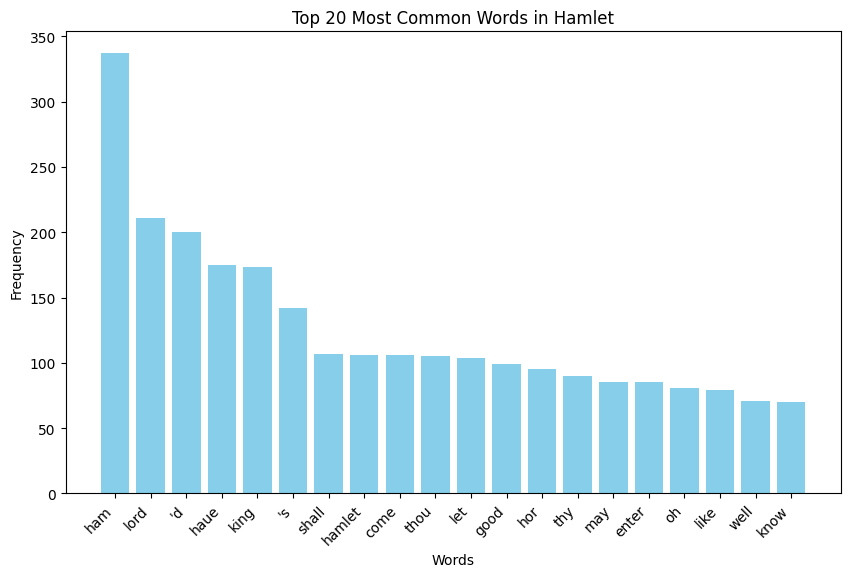

In [7]:
from collections import Counter

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 20
top_20_words = word_counts.most_common(20)

# Separate words for plotting
words, counts = zip(*top_20_words)

# Plot top 20 in bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words in Hamlet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


<ipython-input-8-9c4830bd3bf4>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


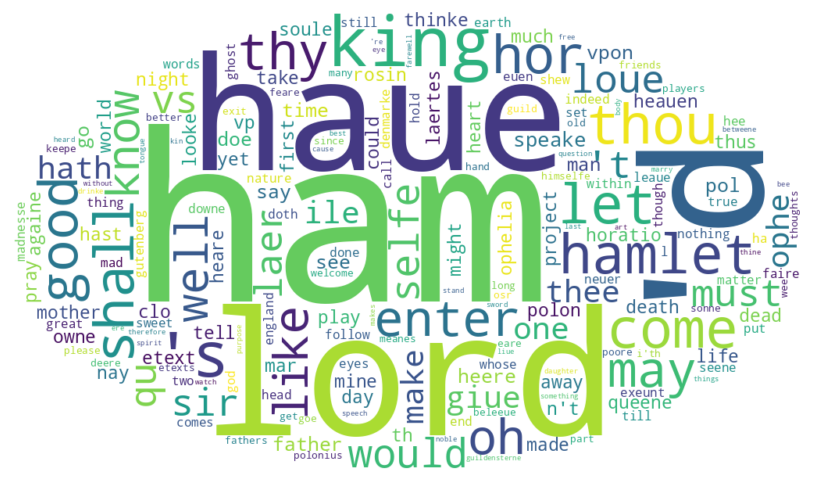

In [8]:
# Import the mask image
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

# Create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask_image, contour_color='black').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
